In [1]:
# Copyright 2023, Acadential, All rights reserved.

# 2-6. PyTorch 기초 - Datasets와 DataLoader

## Dataset 불러오기

torchvision에서는 다양한 Computer Vision용의 benchmark dataset을 제공합니다.\
대표적으로:
1. Cifar10, Cifar100
2. MNIST
3. Fashion MNIST
4. Cityscapes

등등이 있습니다. 여기 [참고](https://pytorch.org/vision/stable/datasets.html)

이번 실습에서는 CIFAR10에 대해서 살펴보도록 하겠습니다.

참고로, CIFAR10 데이터셋이란, 10개의 클래스로 이루어진 60000개의 32x32 컬러 이미지 데이터셋입니다. 10개의 클래스는 다음과 같습니다: 
- "plane"
- "car"
- "bird"
- "cat"
- "deer"
- "dog"
- "frog"
- "horse"
- "ship"
- "truck"

즉, CIFAR10은 이미지가 주어졌을때 이 이미지가 어떤 클래스에 속하는지를 맞추는 분류하는 Classification task에 대한 데이터셋입니다.

## CIFAR10 데이터셋 불러오기



```torchvision.datasets.CIFAR10```을 통해서 데이터셋을 다운로드 받을 수 있습니다. CIFAR10은 다음과 같은 parameter을 가집니다.
1. root = dataset을 다운로드 받을 위치. 혹은 다운로드 받은 데이터셋이 저장된 위치.
2. train = train dataset인지 혹은 test dataset인지 명시
3. download = 다운로드 받을 것인지 명시
4. transform = image을 어떻게 transform할 것인지 명시 (e.g. Random Crop, Resize, ToTensor)

In [14]:
# import library
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [3]:
# cache 폴더 생성하기
# 여기다 CIFAR10의 raw데이터를 저장해주겠다.
# os.mkdir()과 os.makedirs()차이 , mkdir은 한폴더만 생성가능, makedirs는 여러폴더 생성가능
# exist_ok=True는 저장할 파일이 이미 있다면 예외발생하지 않고 넘어가게 하는 옵션
os.markedirs("../.cache", exist_ok=True)


In [6]:
# 데이터셋 불러오기
training_data = datasets.CIFAR10(
    root = "../.cache",
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.CIFAR10(
    root = "../.cache",
    train = False, # train과 이거하나 차이
    download = True,
    transform = ToTensor()
)

100.0%


Extracting ../.cache\cifar-10-python.tar.gz to ../.cache
Files already downloaded and verified


### Labels map

CIFAR10 데이터셋은 각 label class을 integer로 변환시켜서 출력합니다. \
어떤 integer가 label class에 해당되는지 labels_map으로 정의해보겠습니다.

In [7]:
labels_map = {
    0:"plane",
    1:"car",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck",
}

In [ ]:
dir(training_data)

### CIFAR10에 포함된 예시

In [ ]:
# 랜덤한 값을 가지는 텐서생성
# torch.rand() : 0과 1사이의 숫자를 균등하게생성
# torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존 텐서로 정의
# torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
# torch.randn_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로정의
# torch.randint() : 주어진 범위 내 정수를 균등하게 생성, 자료형은 torch.float32


In [24]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
print(sample_idx)
type(sample_idx)

3184


int

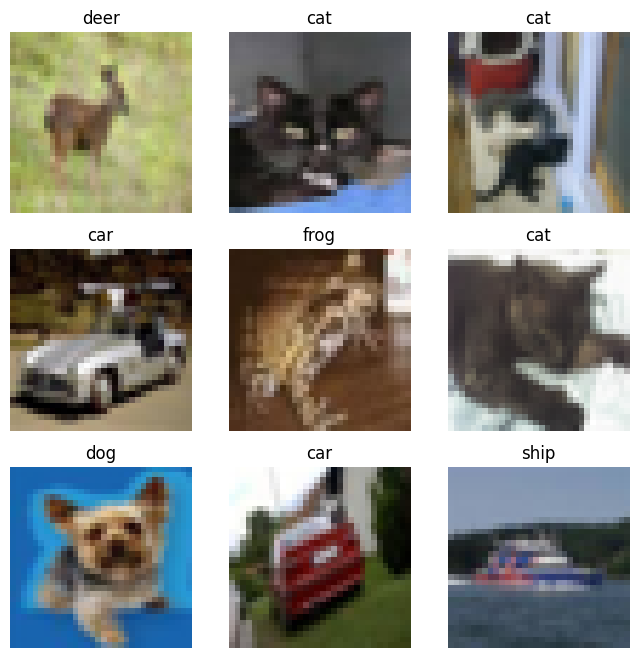

In [28]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # 1. torch.randint(len(training_data), size=(1,)) :
    #  -> 0부터 train 데이터의 길이 사이의 값을 랜덤으로 뽑아 스칼라(size=(1,) 텐서로 반환
    # 2. .item()
    #  -> 일반적인 python number 로 리턴함. (리스트리턴시 tolist() 사용)
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    
    # training_data은 img (3D tensor), label (scalar tensor) 을 출력합니다.
    img, label = training_data[sample_idx]
    
    # figure 화면분할위치 (최대행, 최대열, i번째 위치)
    figure.add_subplot(rows, cols, i)
    
    # labels_map으로부터 출력된 (integer)로 변환된 label을 원래의 string으로 된 label로 바꾸는 것.
    # 위에서 만든 labels_map의 index값으로 label값 입력하여 title 출력
    plt.title(labels_map[label])
    
    plt.axis("off")
    
    # ToTensor은 PIL image (Height, Width, Channel)을 (Channel, Height, Width)로 바꿉니다.
    # 따라서 (Channel, Height, Width)로 된 tensor을 다시 (Height, Width, Channel)로 바꿔줘야합니다.
    plt.imshow(img.permute(1,2,0))
plt.show()

# 이미지 데이터 전처리

```torchvision```을 통해 ```CIFAR10``` Dataset을 불러올 수 있었습니다. 그럼 CIFAR10 데이터셋의 이미지 데이터를 어떻게 전처리하는지 살펴보도록 하겠습니다.

1. Pillow (PIL) Library로 이미지 파일 읽기
2. (PIL로 읽어온) 이미지를 numpy 배열로 변환하기
3. Numpy 배열을 Torch Tensor로 변환하기 

## Pillow (PIL) Library로 이미지 파일 읽기

이미지 데이터들은 흔히 ```.png```, ```.jpeg``` 파일 형식으로 저장됩니다. 이런 파일을 읽을때는 ```Pillow``` library의 ```PIL.Image.open```을 사용해서 읽어올 수 있습니다.

In [29]:
from PIL import Image

In [35]:
os.getcwd()

'e:\\Study\\Python\\DL\\PracticFile'

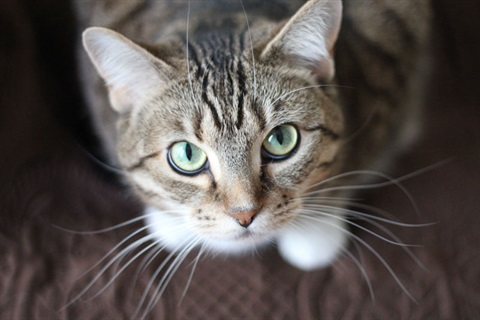

In [37]:
img = Image.open("./sample_images/cat_img.jpeg")
img

## (PIL로 읽어온) 이미지를 numpy 배열로 변환하기

In [42]:
img.size

(480, 320)

In [58]:
# 이 이미지는 기본내장 함수가아닌 PIL 패키지를 이용해서 로드되었다는 것을 알 수 있다.
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [54]:
# PIL 패키지로 가져온 이미지를 array 타입으로 변환하여 np_img로 저장한다.
np_img = np.array(img)

In [55]:
# 가로, 세로가 뒤바뀌고 채널이 추가된 3차원의 array 타입으로 저장된다.
# 이때 갑은 0~255까지의 정수값을 가진다.
np_img.shape

(320, 480, 3)

Height, Width, Channel 개수로 총 3개의 차원을 가지는 3차원 텐서입니다.

In [43]:
np_img.dtype

dtype('uint8')

In [57]:
# 각 채널에 대해서 범위 확인
# 각 채널(R, G, B)값의 최소, 최대값은 0~255이다.
# array 포맷이므로 np.min, np.max를 사용
#(아래 참고사항 설명과 같음)
for each_channel in range(3) :
    print("{}-th min value : ".format(each_channel), np.min(np_img[:,:, each_channel]))
    print("{}-th max value : ".format(each_channel), np.max(np_img[:,:, each_channel]))

0-th min value :  0
0-th max value :  255
1-th min value :  3
1-th max value :  255
2-th min value :  1
2-th max value :  255


이처럼 R, G, B channel의 각 value은 0~255 사이의 integer이다.

### 참고 사항:

Image을 numpy ndarray으로 변환하면 ndarray의 각 dimension은 ***(height, width, number of channel)*** 이다!

## PIL.Image 혹은 Numpy 배열을 Torch Tensor로 변환하기 

Numpy 배열은 Torch Tensor로 변환할 수 있고 그 반대도 가능합니다. \
```torchvision.transforms.ToTensor```를 사용하면 numpy 배열을 torch tensor로 변환할 수 있습니다.

```ToTensor```은 numpy 배열에 적용할 수도 있고, PIL.Image에 바로 적용할 수도 있습니다. (출력되는 결과는 같습니다.)

참고로 ToTensor은 이미지 데이터의 값의 범위를 0~1 사이로 normalize합니다. (0~255 사이의 integer를 0~1 사이의 float으로 변환)

## PIL.Image -> torch.Tensor

In [50]:
tensor_img = ToTensor()(img)

In [51]:
# array가 torch.tensor로 바뀌면서
# 채널이 맨앞에, 가로, 높이위치가 바뀌게됨. 기존 img 의 shape (480,320)
tensor_img.shape

torch.Size([3, 320, 480])

In [59]:
# tensor 포맷이므로 torch.min, torch.max 사용
for each_channel in range(3) :
    print('{}-th min value : '.format(each_channel), torch.min(tensor_img[each_channel, :, :]))
    print('{}-th max value : '.format(each_channel), torch.max(tensor_img[each_channel, :, :]))

0-th min value :  tensor(0.)
0-th max value :  tensor(1.)
1-th min value :  tensor(0.0118)
1-th max value :  tensor(1.)
2-th min value :  tensor(0.0039)
2-th max value :  tensor(1.)


torch.float32

### ToTensor에 대한 참고 사항:

보다시피 ToTensor은 다음과 같이 바꿔줍니다:
1. Channel에 대한 차원이 맨 앞으로 오게 바꿔줍니다: 
    - (height, width, number of channels) -> (number of channels, height, width)
    - i.e. (H, W, C) -> (C, H, W)
2. 값을 255로 나눠줍니다
-> 0\~1의 값으로 두는 이유는 알고리즘이 프로그래밍된 경우 더 적절하며 많은 작업이 자연스러워지기때문
    - 0\~255 -> 0\~1의 값
3. uint8 -> float32
    

## np.ndarray -> torch.Tensor

Numpy ndarray에 대해서도 동일하게 적용될 수 있습니다!

In [60]:
tensor_img2 = ToTensor()(np_img)

In [61]:
tensor_img2.shape

torch.Size([3, 320, 480])

In [63]:
for each_channel in range(3) :
    print('{}-th min value : '.format(each_channel), torch.min(tensor_img2[each_channel, :, :]))
    print('{}-th max value : '.format(each_channel), torch.max(tensor_img2[each_channel, :, :]))

0-th min value :  tensor(0.)
0-th max value :  tensor(1.)
1-th min value :  tensor(0.0118)
1-th max value :  tensor(1.)
2-th min value :  tensor(0.0039)
2-th max value :  tensor(1.)


# Dataset customize하기

Dataset을 customize하기 위해서는 ```torch.utils.data.Dataset```을 상속받아야 합니다.

In [64]:
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset) :
    def __init__ (self, annotations_file, img_dir, transform=None, target_transform=None) :
        # CustomImageDataset Class을 Object로 initialize할때 실행되는 함수.
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform # 이미지에 대해적용한 transform
        self.target_transform = target_transform # 레이블에 대해적용한 transform
        
    def __len__ (self) :
        # Data의 개수가 총 몇 개인지 명시하는 함수.
        # DataLoader에서 Dataset의 Length을 참고해서
        # mini-batch을 (mini-batch size) // (dataset length) 개수만큼 만든다.
        print('__len__ 출력 : 데이터갯수 -')
        return len(self.img_labels)
    
    def __getitem__(self, idx) : 
        # 여기서 각 data sample을 불러와서 어떻게 transform해서 tensor로 output할지 명시한다.
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.taret_transform(label)
        return image, label

## Dataset에서 구현해야하는 method들

Dataset에서는 다음 3가지 method들을 구현해야합니다.
1. ```__init__```
2. ```__len__```
3. ```__getitem__```

### ```__init__```
Initialization method. \
CustomImageDataset Class을 Object로 initialize할때 실행되는 함수. \
여기서 
1. annotations_file: label이 csv로 저장되어 있는 위치
2. img_dir: image들이 저장되어 있는 폴더 위치 
3. transform: image에 대한 transform 함수
4. target_transform: label에 대한 transform 함수 등을 명시한다.

### ```__len__```
Length method. \
Data의 개수가 총 몇 개인지 명시하는 함수. DataLoader에서 Dataset의 Length을 참고해서 mini-batch을 (mini-batch size) // (dataset length) 개수만큼 만든다.


### ```__getitem__```
Getitem method. \
여기서 각 data sample을 불러와서 어떻게 transform해서 tensor로 output할지 명시한다.


## DataLoader

DataLoader은 Dataset을 감싸는 함수이고 각 Data를 mini-batch로 구성하여 출력해줍니다. \
DataLoader에서 num_workers을 명시하면 해당 개수만큼 subprocess를 생성하여 데이터를 로딩합니다. (default: 0) \
그리고 pin_memory=True로 설정하면 GPU memory을 미리 확보해놓고 데이터를 GPU에 올릴 수 있게 해줍니다. (default: False) \
마지막으로 shuffle=True로 설정하면 데이터를 무작위로 sampling합니다. (default: False)


DataLoader에서는 다음과 같은 parameter을 명시해준다:
1. dataset: 
2. batch_size: mini-batch 크기
3. shuffle: 무작위 순서로 데이터를 sampling할 것인지
4. num_workers: 데이터 로딩에 사용할 subprocess 개수. 
5. pin_memory: GPU memory을 pin 할 것인지
6. drop_last: 마지막 mini-batch을 drop할 것인지.


참고로, num_workers수가 많을수록 데이터 로딩이 더 빠르지만 그만큼 CPU core개수도 충분해야합니다. (CPU core 개수보다 num_workers가 많으면 오히려 느려지는 경우 발생) \
pin_memory=True로 했을시 GPU (cuda) memory을 미리 할당, 확보시켜줘서 조금 더 빠르게 데이터를 GPU에 올릴 수 있게 해줍니다.



In [65]:
from torch.utils.data import DataLoader
# Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 
# 모델을 학습할 때, 일반적으로 샘플들을 《미니배치(minibatch)》로 전달하고,
# 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고,
# Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.
# DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.
# DataLoader 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다.
# 아래의 각 순회(iteration)는 (각각 batch_size=64 의 특징(feature)과 정답(label)을 포함하는)
# train_features 와 train_labels 의 묶음(batch)을 반환합니다.
# shuffle=True 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape : torch.Size([64, 3, 32, 32])
Labels batch shape : torch.Size([64])
Label : cat


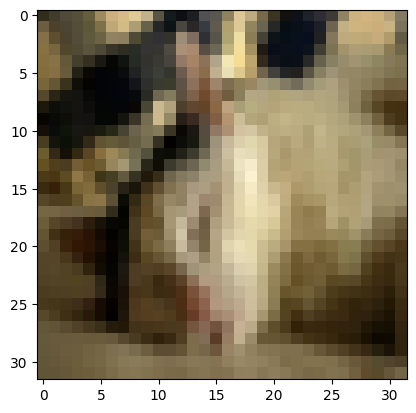

In [83]:
train_features, train_labels = next(iter(train_dataloader))
# train_features.size()는 64개로 세분화된 미니배치 크기, 채널, 가로, 세로 길이를 보여준다.
print("Feature batch shape : {}".format(train_features.size()))
# train_labels.size()도 미니배치 크기만큼 있는 것을 확인할 수 있다.
print("Labels batch shape : {}".format(train_labels.size()))
img = train_features[0].squeeze() # squeeze() 길이가 1인 차원이 없는 행 백터, 열백터, 스칼라 배열을 삭제한다.
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show
print("Label : {}".format(labels_map[label.item()]))

## Iterator

참고로 iter 함수는 train_dataloader을 iterable하게 만들어주고, next 함수는 iterator로부터 다음 샘플을 샘플링한다.

In [93]:
iterator = iter([0,1,2,3,4])

In [94]:
next(iterator)

0

In [95]:
next(iterator)

1